Will you

`pip install patsy scikit-learn`

?

In [1]:
import numpy as np
import plotnine as pn
import patsy as pt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# from github.com/roualdes/data
penguins_url = "https://raw.githubusercontent.com/roualdes/data/refs/heads/master/penguins.csv"
df = pd.read_csv(penguins_url)

/Users/edward/venvs/py3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


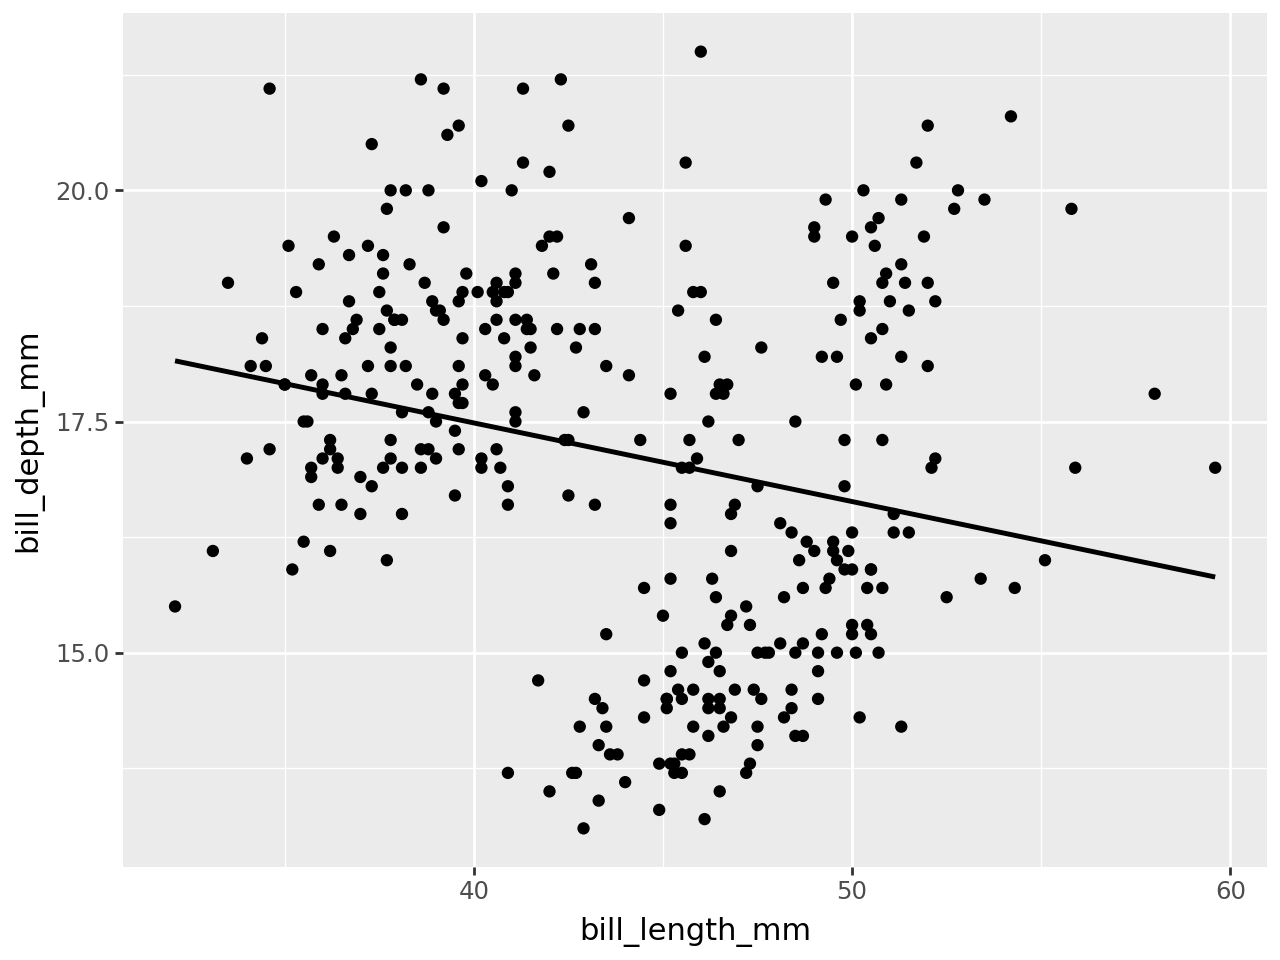

In [84]:
pn.ggplot() + \
    pn.geom_point(df, pn.aes("bill_length_mm", "bill_depth_mm")) + \
    pn.geom_smooth(df, pn.aes("bill_length_mm", "bill_depth_mm"), 
                   method = "lm", se = False) # try removing method = "lm" for fun

In [33]:
y, X = pt.dmatrices("bill_depth_mm ~ bill_length_mm", df)

In [34]:
fit = LinearRegression(fit_intercept = False).fit(X, y)
fit.coef_

array([[20.88546832, -0.08502128]])

In [35]:
fit.coef_ @ np.array([1, 42])

array([17.31457453])

In [36]:
fit.coef_[0][0] + 42 * fit.coef_[0][1]

17.314574525891345

In [37]:
idx = df["bill_length_mm"] == 42
df.loc[idx, "bill_depth_mm"]

9      20.2
53     19.5
168    13.5
Name: bill_depth_mm, dtype: float64

In [38]:
20.2 - fit.coef_[0][0] + 42 * fit.coef_[0][1] # residual for x_9 = 42

-4.256362111174189

/Users/edward/venvs/py3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


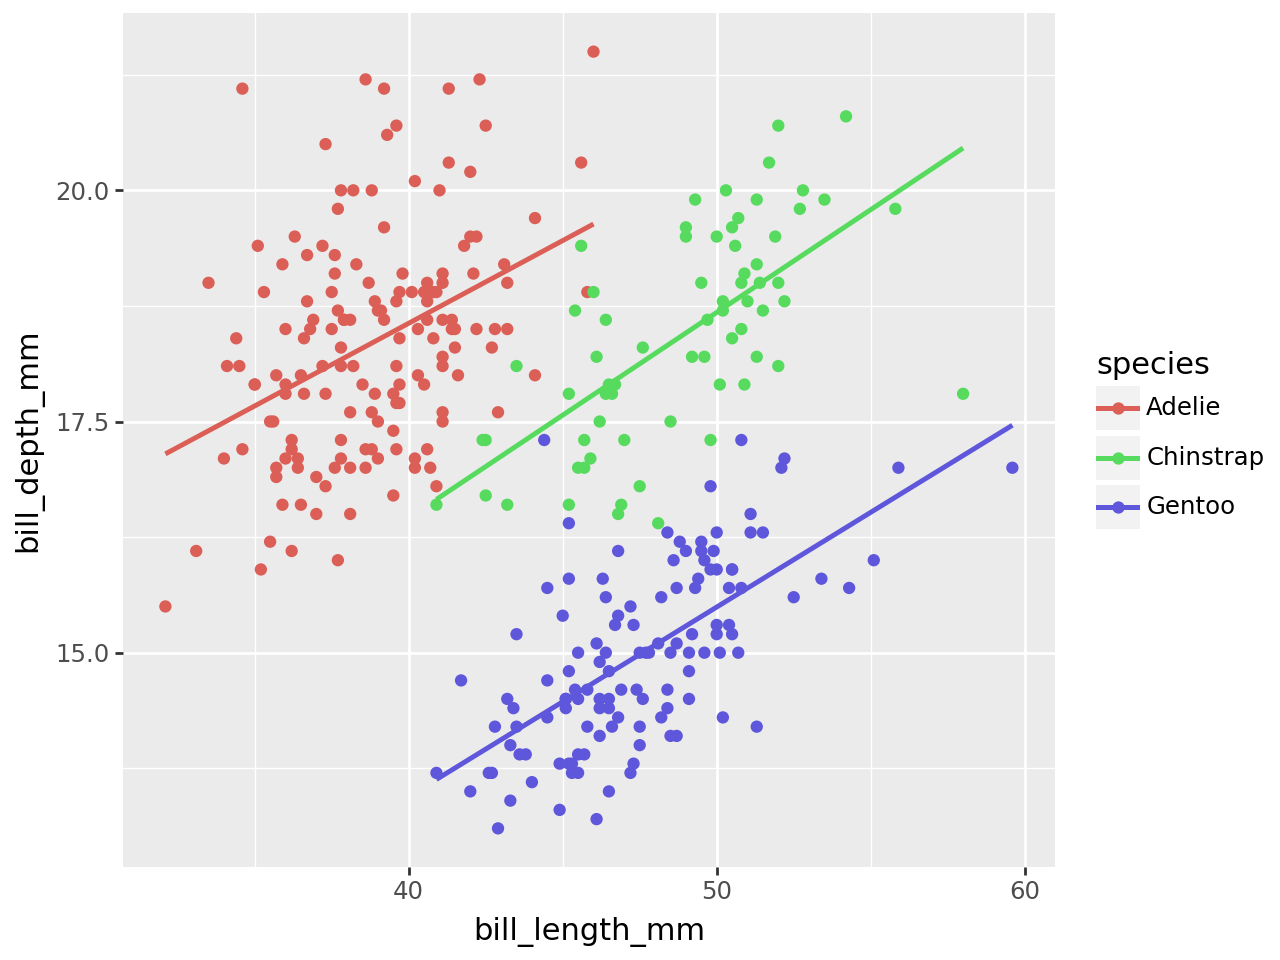

In [86]:
pn.ggplot() + \
    pn.geom_point(df, pn.aes("bill_length_mm", "bill_depth_mm", color = "species")) + \
    pn.geom_smooth(df, pn.aes("bill_length_mm", "bill_depth_mm", color = "species"), 
                   method = "lm", se = False) # try removing method = "lm" for fun

In [90]:
# patsy
y, X = pt.dmatrices("bill_depth_mm ~ species + species:bill_length_mm", df)
# y, X = pt.dmatrices("bill_depth_mm ~ species * bill_length_mm", df)
fit = LinearRegression(fit_intercept = False).fit(X, y)
fit.coef_

array([[11.40912448, -3.83998436, -6.15811608,  0.17883435,  0.22221172,
         0.20484434]])

# Take 2

In [11]:
# github.com/roualdes/data
carnivora_url = "https://raw.githubusercontent.com/roualdes/data/refs/heads/master/carnivora.csv"
df = pd.read_csv(carnivora_url)

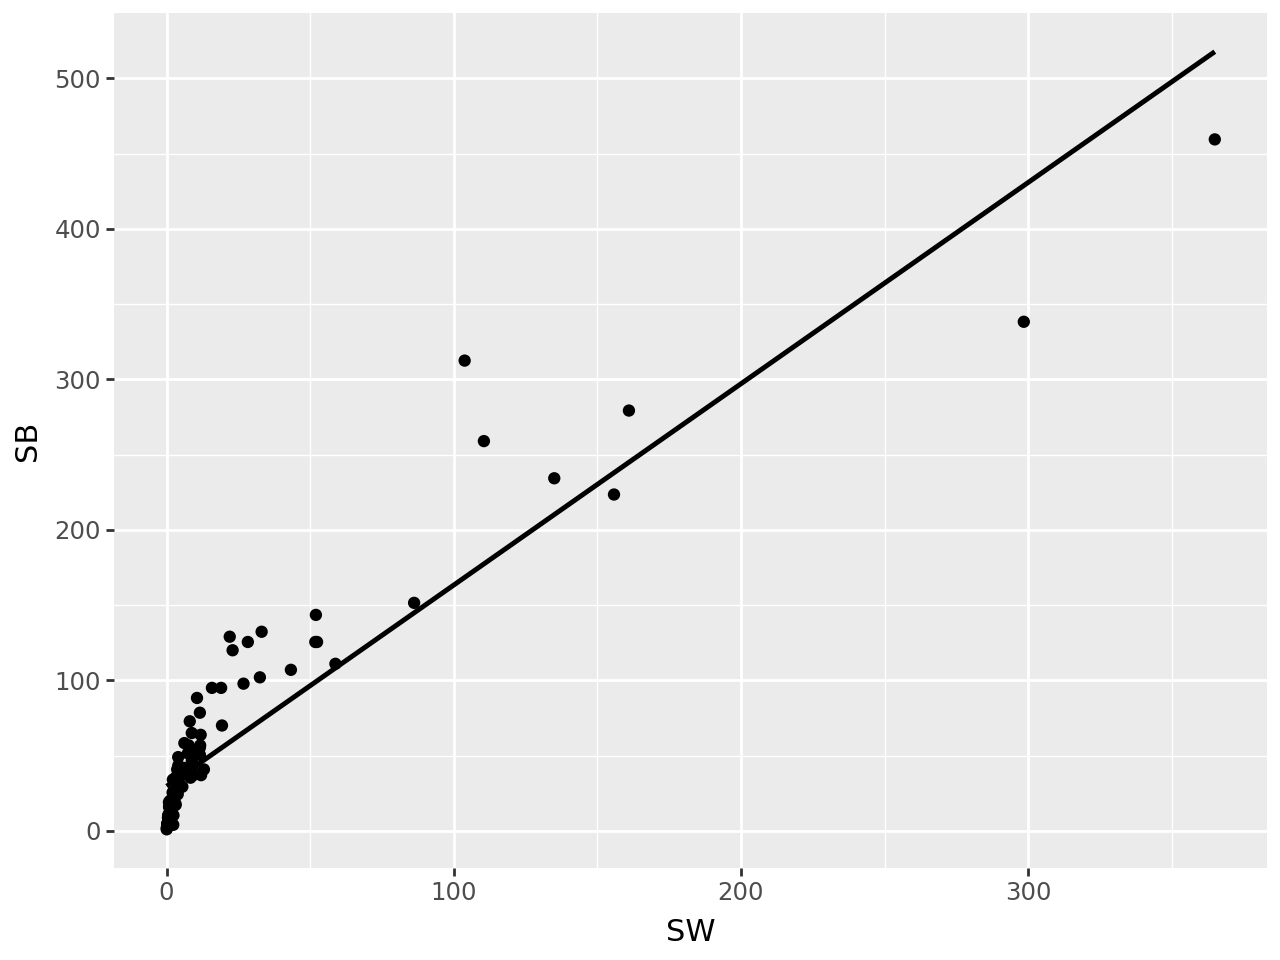

In [12]:
pn.ggplot(df) + \
    pn.geom_point(pn.aes("SW", "SB")) + \
    pn.geom_smooth(pn.aes("SW", "SB"), method = "lm", se = False)

In [13]:
y, X = pt.dmatrices("SB ~ SW + I(SW * SW)", df)
fit = LinearRegression(fit_intercept = False).fit(X, y)
beta = fit.coef_[0]

In [24]:
x = X[:, 1]
x = np.linspace(np.min(x), np.max(x), np.size(df["SW"]))
df["yhat"] = beta[0] + beta[1] * x + beta[2] * x * x
df["x"] = x

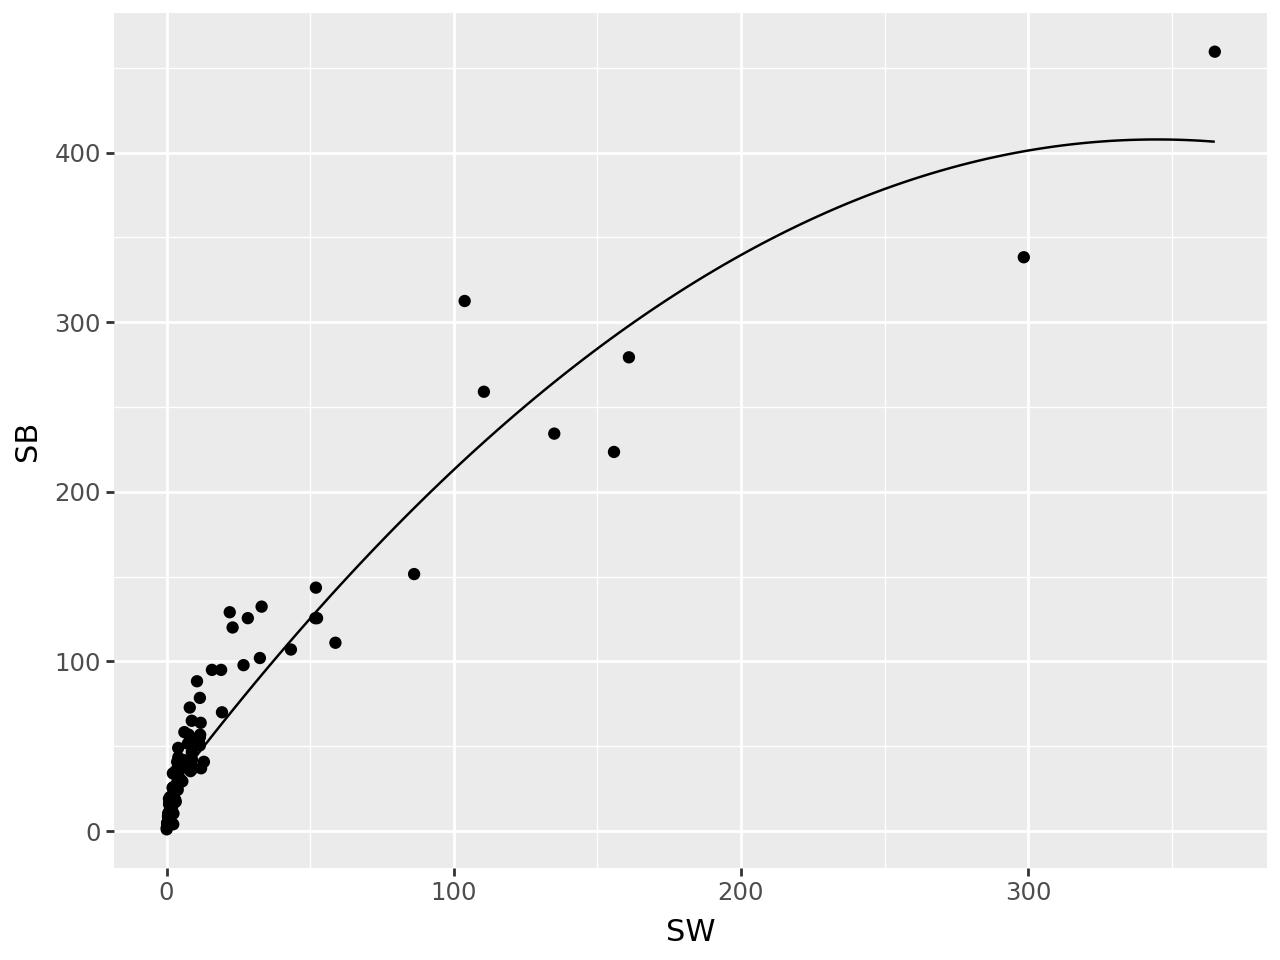

In [23]:
pn.ggplot(df) + \
    pn.geom_point(pn.aes("SW", "SB")) + \
    pn.geom_line(pn.aes("x", "yhat"))

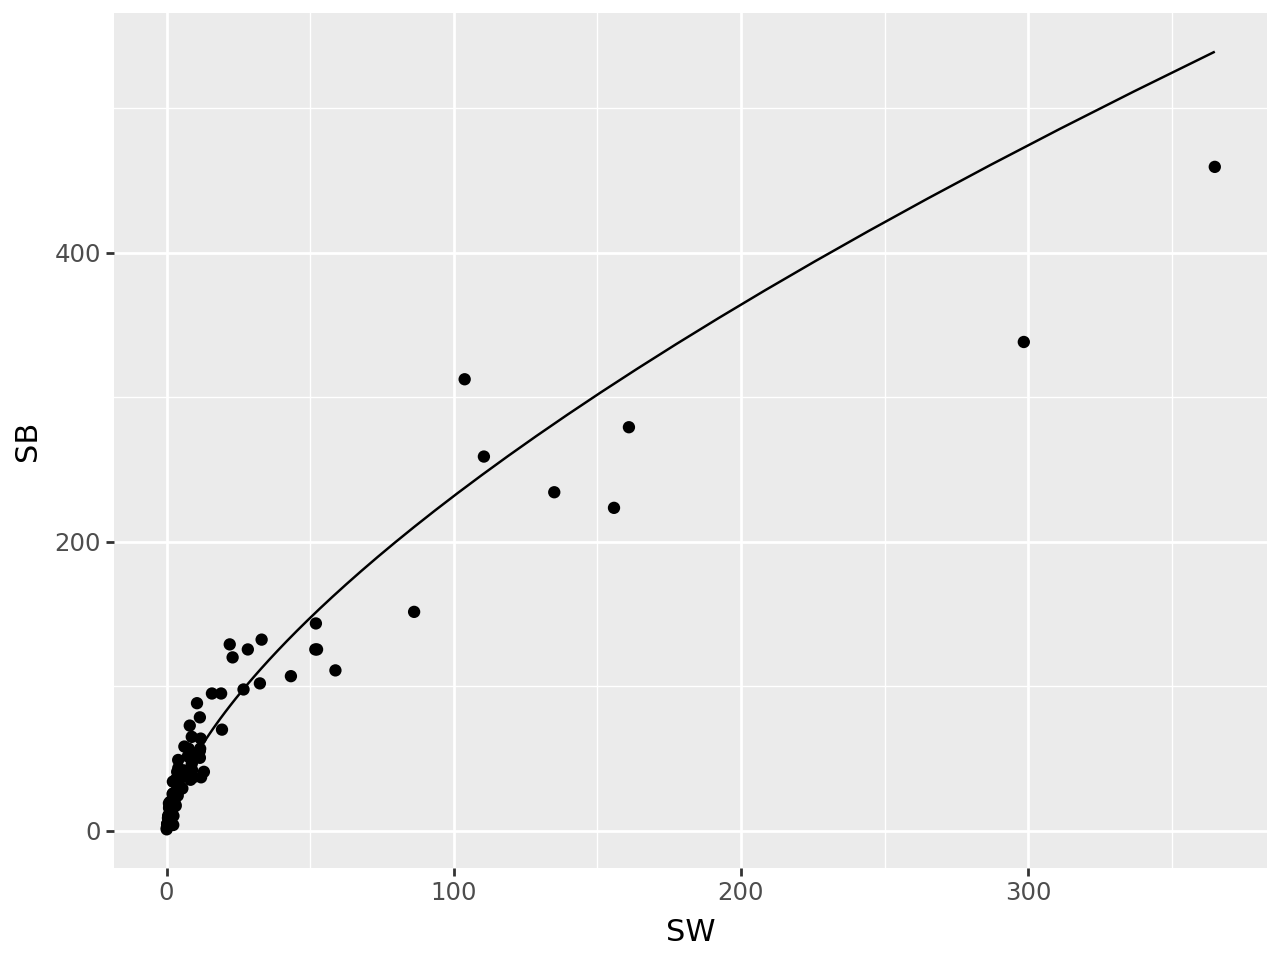

In [25]:
y, X = pt.dmatrices("np.log10(SB) ~ np.log10(SW)", df)
fit = LinearRegression(fit_intercept = False).fit(X, y)
beta = fit.coef_[0]
x = X[:, 1]
x = np.linspace(np.min(x), np.max(x), np.size(df["SW"]))
df["yhat"] = 10 ** (beta[0] + beta[1] * x)
df["x"] = 10 ** x
pn.ggplot(df) + \
    pn.geom_point(pn.aes("SW", "SB")) + \
    pn.geom_line(pn.aes("x", "yhat"))

# Task

In [2]:
# github.com/roualdes/data
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/donkeys.csv")

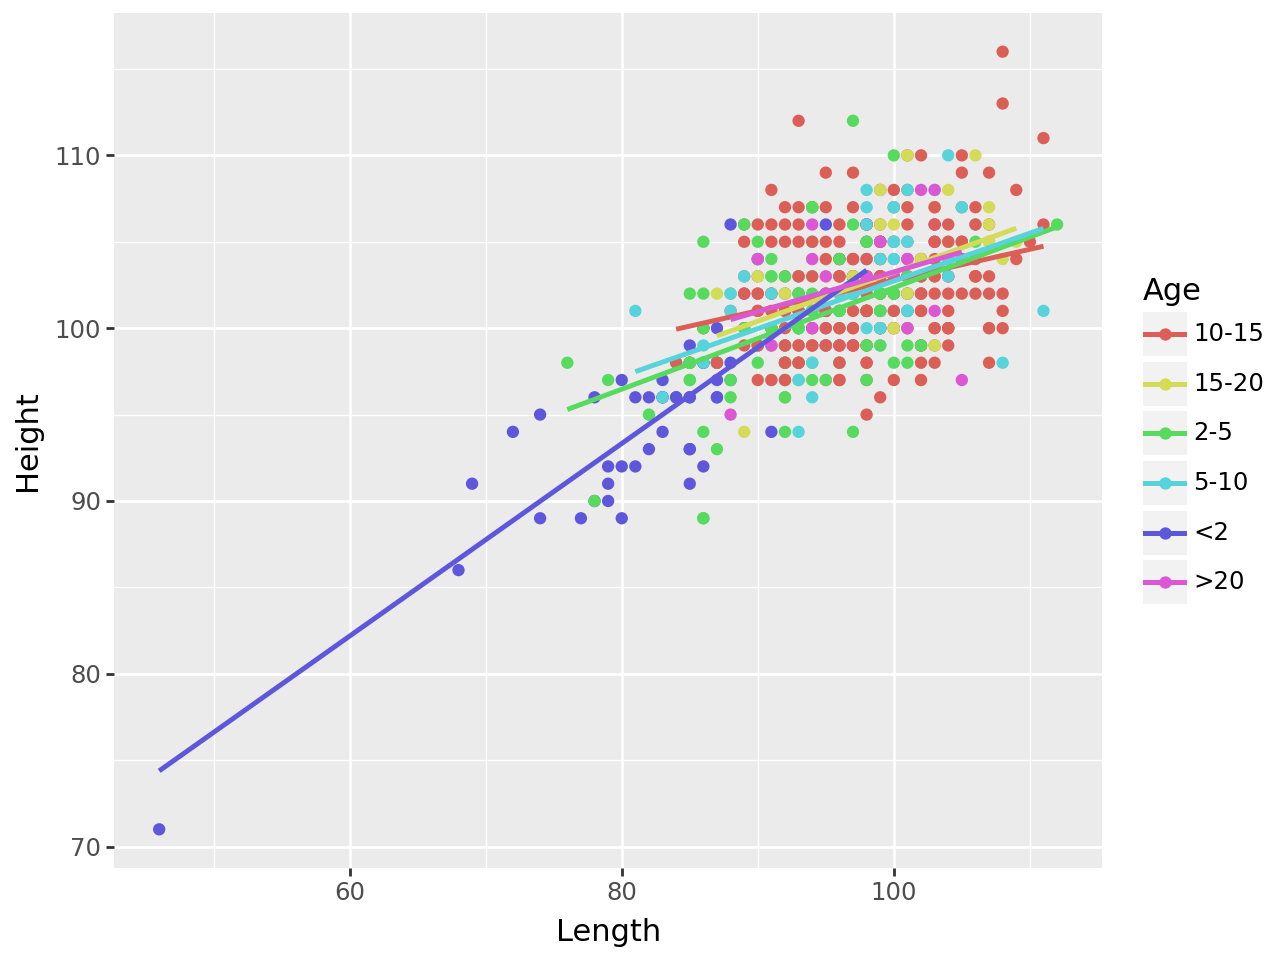

In [6]:
pn.ggplot(df, pn.aes("Length", "Height", color = "Age")) + \
    pn.geom_point() + \
    pn.geom_smooth(method = "lm", se = False)

**Easy** Fit a quadratic model for Donkeys predicting Height with Length.

**Hard** First make a new categorical variable that encodes "old" versus "young" donkey.  Then fit one model to predict Height with length that has separate quadratic functions (over length) for old and young Donkeys.

Which model is better at predicting Height, quadratic or linear?